In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac/'); 
from my_tools import *
from plot_tools import *
%matplotlib inline

In [3]:
generated_df = pd.DataFrame()

In [6]:
def print_output(particle=dict(), p=(1,1,1), v=(0,0,0), t_off=0 , flag=0):
    '''
    p is 3-momentum
    '''
    p_mag = np.sqrt( np.square(p[0]) + np.square(p[1]) + np.square(p[2]) ) 
    p_components = np.array(p)*1./p_mag
    print '2'
    print particle['pid'],' ',p_components[0],' ',p_components[1],' ',p_components[2],' ',p_mag
    print particle['mass'],' ',particle['charge'],' '
    print v[0],' ',v[1],' ',v[2],' ',t_off,' ',flag,' '
    
    
def output2file(particle=dict(), p=(1,1,1), outputfile=None, v=(0,0,0), t_off=0 , flag=0):
    '''
    p is 3-momentum
    '''
    p_mag = np.sqrt( np.square(p[0]) + np.square(p[1]) + np.square(p[2]) ) 
    p_components = np.array(p)*1./p_mag
    outputfile.write('%d'%particle['pid']+' %f'%p_components[0]+' %f'%p_components[1]+' %f'%p_components[2]+' %f'%p_mag+'\n')
    outputfile.write('%f'%particle['mass']+' %d'%particle['charge']+'\n')
    outputfile.write('%f'%v[0]+' %f'%v[1]+' %f'%v[2]+' %d'%t_off+' %d'%flag+'\n')

In [7]:
def print_event( Pe, Pprotons ):    
    print_output( electron , Pe )
    for Pp in Pprotons:
        print_output( proton , Pp )  
        
def output_event( Pe, Pprotons , outputfile):    
    Nparticles = 1 + len(Pprotons)
    outputfile.write('%d\n'%Nparticles)
    output2file( electron , Pe , outputfile)
    for Pp in Pprotons:
        output2file( proton , Pp , outputfile)  

# simulation of (e,e'p) with a fixed electron

In [10]:
run = 100

In [4]:
electron = dict({'mass':0.000511,'charge':-1,'pid':11})
proton = dict({'mass':0.938272,'charge':1,'pid':2212})
Pp_min,Pp_max = 0.2,1.0

In [5]:
# a single electron that passes RECSIS cuts...
Pe = (-0.137*4.306 , -0.339*4.306 , 0.956*4.306 ) 

In [8]:
N_events = 1000 #000
outputfile = open('/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run%d.txt'%run,'w')
for i_event in range(N_events):
    if i_event%(N_events/10)==0: print '%.0f'%(100*float(i_event)/N_events)+'%'
    # unifrom proton momentum magnitude in the desired range
    Pp_mag = np.random.uniform( Pp_min , Pp_max )
    # unifrom proton direction
    Pp_cos_theta = np.random.uniform( -1 , 1 )
    Pp_theta = np.arccos(Pp_cos_theta)
    Pp_phi = np.random.uniform( 0 , 2*np.pi )
    
    Pp = ( Pp_mag*np.sin(Pp_theta)*np.cos(Pp_phi), Pp_mag*np.sin(Pp_theta)*np.sin(Pp_phi), Pp_mag*np.cos(Pp_theta) )
    #print_event( Pe, [Pp] )
    output_event( Pe, [Pp] , outputfile )
    
    generated_df=generated_df.append({'Pp_mag':Pp_mag,'Pp_theta':Pp_theta,'Pp_phi':Pp_phi
                                     },ignore_index=True)
    
print 'done. wrote\n'+'/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run%d.txt'%run 

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
done. wrote
/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run100.txt


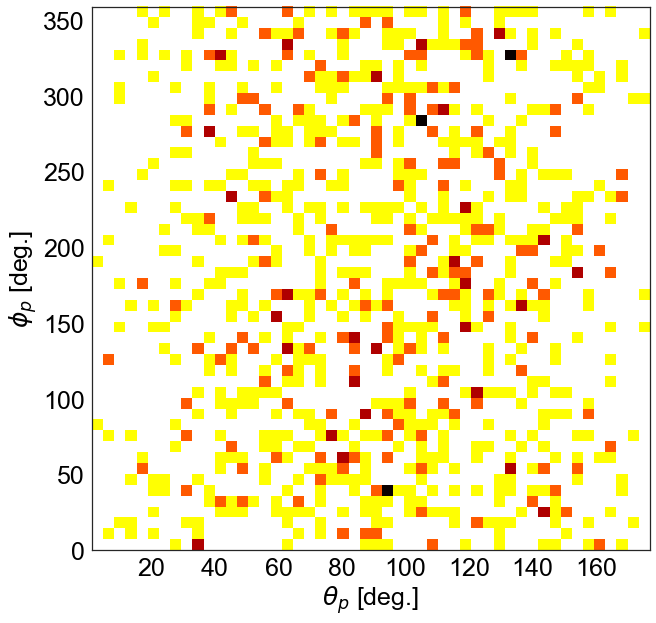

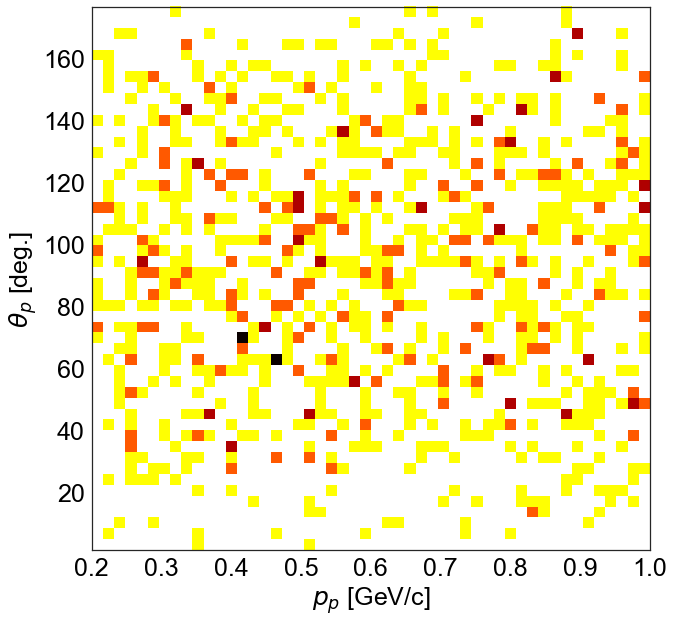

In [9]:
plot_2d_hist(180./np.pi*generated_df['Pp_theta'],180./np.pi*generated_df['Pp_phi'],xlabel=r'$\theta_p$ [deg.]',ylabel=r'$\phi_p$ [deg.]');
plot_2d_hist(generated_df['Pp_mag'],180./np.pi*generated_df['Pp_theta'],xlabel=r'$p_p$ [GeV/c]',ylabel=r'$\theta_p$ [deg.]');

# simulation of (e,e') events with a electrons from our data

In [10]:
run = 890

In [4]:
electron = dict({'mass':0.000511,'charge':-1,'pid':11})

In [5]:
# a single electron that passes RECSIS cuts...
Pe = (-0.137*4.306 , -0.339*4.306 , 0.956*4.306 ) 

In [17]:
N_events = 100 #000
outputfile = open('/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run%d.txt'%run,'w')
for i_event in range(N_events):
    if i_event%(N_events/10)==0: print '%.0f'%(100*float(i_event)/N_events)+'%'
    # unifrom proton momentum magnitude in the desired range
    Pp_mag = np.random.uniform( Pp_min , Pp_max )
    # unifrom proton direction
    Pp_cos_theta = np.random.uniform( -1 , 1 )
    Pp_theta = np.arccos(Pp_cos_theta)
    Pp_phi = np.random.uniform( 0 , 2*np.pi )
    
    Pp = ( Pp_mag*np.sin(Pp_theta)*np.cos(Pp_phi), Pp_mag*np.sin(Pp_theta)*np.sin(Pp_phi), Pp_mag*np.cos(Pp_theta) )

    Pe_mag = np.random.uniform( 0 , 1 )
    Pe_cos_theta = np.random.uniform( -1 , 1 )
    Pe_theta = np.arccos(Pe_cos_theta)
    Pe_phi = np.random.uniform( 0 , 2*np.pi )
    
    Pe = ( Pe_mag*np.sin(Pe_theta)*np.cos(Pe_phi), Pe_mag*np.sin(Pe_theta)*np.sin(Pe_phi), Pe_mag*np.cos(Pe_theta) )


    
    #print_event( Pe, [Pp] )
    output_event( Pe, [Pp] , outputfile )
    
    generated_df=generated_df.append({ 'Pe_mag':Pe_mag,'Pe_theta':Pp_theta,'Pe_phi':Pp_phi
                                     },ignore_index=True)
    
print 'done. wrote\n'+'/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run%d.txt'%run 

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
done. wrote
/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run890.txt


ValueError: cannot convert float NaN to integer

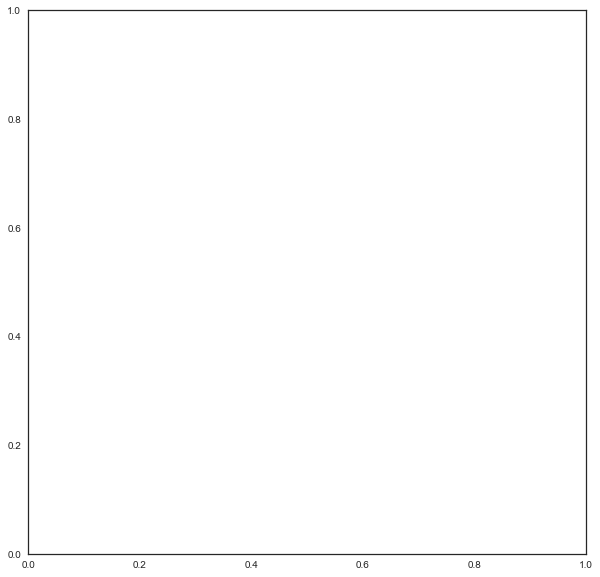

In [18]:
plot_2d_hist(180./np.pi*generated_df['Pe_theta'],180./np.pi*generated_df['Pe_phi'],xlabel=r'$\theta_e$ [deg.]',ylabel=r'$\phi_p$ [deg.]');
# plot_2d_hist(generated_df['Pp_mag'],180./np.pi*generated_df['Pp_theta'],xlabel=r'$p_p$ [GeV/c]',ylabel=r'$\theta_p$ [deg.]');